# Title: AIDI 1002 Final Term Project Report

#### Members' Names or Individual's Name: Mohammad Zameer Khan, Rushil Ketanbhai Bhavsar

####  Emails: zameer96@gmail.com, rushilbhavsar206@gmail.com

# Introduction:

#### Problem Description:

Employing machine learning techniques, forecast the results of the ICC 2019 Cricket World Cup. The complexity of the game and the numerous variables that might affect a match, such as the weather, team makeup, and player performance, make it difficult to forecast the results of sporting events like the Cricket World Cup.

#### Context of the Problem:

A significant international cricket championship event, the ICC Cricket World Cup is held once every four years. From May to July 2019, England and Wales hosted the 2019 ICC Cricket World Cup, which pitted 10 international teams against one another in round-robin matches before moving on to knockout rounds.

#### Limitation About other Approaches:

The limitations of traditional statistical model and expert predictions for predicting sports outcomes. ML overcomes these limitations by learning patters and relationships in the data without relying on pre-defined assumptions or expert knowledge. However, limitations to ML include the need for large amounts of high-quality data and the potential for overfitting or underfitting the model.

#### Solution:

How the method you are discussing is going to solve it today. Wrtie couple of sentences only.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
|Abhinav Sagar | They used machine learning to predict the outcome of ICC 2019 Cricket World Cup matches | ICC 2019 Cricket World Cup dataset | Relies on past performance and cannot account for unforeseen circumstances


# Methodology

The methodology of the paper is that they have taken a dataset of cricket world cup prediction where different teams will play their respective matches with one another>in this they have taken winner as there label columns that will help us build our model and to predict what will be the outcome of the data. After that some eda on the dataset which we have explore more in it followed by feature engineering which willl help us to convert our categorical columns to numerical columns.And lastly the main aim is to build a model using different techniques.After making a prediction, we must then determine which team performed best.After making another prediction, we will finally be able to determine which team will win the World Cup. From that prediction, we can determine which teams will face each other in the Semifinal and Final. The paper must adhere to this methodology.And from that methodology, we can conclude that they didn't employ hyperparameter in their model, despite the fact that this is a technique that would have helped the model grow deeper and allow for better model prediction.Consequently, we have utilised hyperparameter with various algorithms—they have only used one algorithm, whereas we have used a total of three—and after comparing the accuracy of each, we have determined that this algorithm performs better than the standard algorithm.

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import *
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
world_cup = pd.read_csv("datasets/World Cup 2019 Dataset.csv")
results = pd.read_csv('datasets/results.csv')

# Data cleaning and formatting

df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
# india.head()

#### EDA of the dataset

In [3]:
# df.info()

In [4]:
# df.describe()

In [5]:
# df.head()

In [6]:
year = []
for row in india['date']:
    year.append(int(row[7:]))
india ['match_year']= year
india_2010 = india[india.match_year >= 10]
india_2010.count()

date          151
Team_1        151
Team_2        151
Winner        151
Margin        142
Ground        151
match_year    151
dtype: int64

In [7]:
df.tail()

,date,Team_1,Team_2,Winner,Margin,Ground
980,28-Sep-17,India,Australia,Australia,21 runs,Bengaluru
982,1-Oct-17,India,Australia,India,7 wickets,Nagpur
991,22-Oct-17,India,New Zealand,New Zealand,6 wickets,Mumbai
994,25-Oct-17,India,New Zealand,India,6 wickets,Pune
995,29-Oct-17,India,New Zealand,India,6 runs,Kanpur


In [8]:
#  Exploratory data analysis

worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
# df_teams.count()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
...,...,...,...,...,...,...
933,21-May-17,Ireland,New Zealand,New Zealand,190 runs,Dublin (Malahide)
940,3-Jun-17,South Africa,Sri Lanka,South Africa,96 runs,The Oval
986,15-Oct-17,South Africa,Bangladesh,South Africa,10 wickets,Kimberley
988,18-Oct-17,South Africa,Bangladesh,South Africa,104 runs,Paarl


In [9]:
df_teams_2010 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
# df_teams_2010.head()

#### Feature engineering

In [10]:
# Feature engineering and selection

df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

# df_teams_2010.head()

#### Building the model

In [11]:
final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

X = final.drop(['Winner'], axis=1)
y = final["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,                               random_state=0) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print(f"Training set accuracy: {score}") 
print(f"Test set accuracy: {score2}")

Training set accuracy: 0.7002967359050445
Test set accuracy: 0.6751152073732719


In [13]:
ranking = pd.read_csv("datasets/icc_rankings.csv") 
fixtures = pd.read_csv("datasets/fixtures.csv")
pred_set = []

In [14]:
try:
    fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
    fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))
except ValueError:
    print("positions already exists!")

fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [15]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
# pred_set.head()

In [16]:
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
# pred_set.head()

In [17]:
# Interpret the model results

predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

In [18]:

semi = [('New Zealand', 'India'),
            ('England', 'South Africa')]


def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")
        

clean_and_predict(semi, ranking, final, rf)

New Zealand and India
Winner: India

South Africa and England
Winner: England



In [19]:
finals = [('India', 'England')]
clean_and_predict(finals, ranking, final, rf)

India and England
Winner: England



#### Using hyperparameter

In [20]:
def display_outputs(outputs):
    print('Parameter: {}\n'.format(outputs.best_params_))

    mean = outputs.cv_results_['mean_test_score']
    std = outputs.cv_results_['std_test_score']
    for mean, std, params in zip(mean, std, outputs.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [21]:
#applying random forest classifier
r_f = RandomForestClassifier()
parameter = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}
#by applying hyper parameter we can get more accurate result

rf = GridSearchCV(r_f, parameter, cv=5)
rf.fit(X_train, y_train)
display_outputs(rf)

Parameter: {'max_depth': 32, 'n_estimators': 50}

0.42 (+/-0.052) for {'max_depth': 2, 'n_estimators': 5}
0.504 (+/-0.073) for {'max_depth': 2, 'n_estimators': 50}
0.524 (+/-0.059) for {'max_depth': 2, 'n_estimators': 250}
0.537 (+/-0.06) for {'max_depth': 4, 'n_estimators': 5}
0.586 (+/-0.084) for {'max_depth': 4, 'n_estimators': 50}
0.589 (+/-0.06) for {'max_depth': 4, 'n_estimators': 250}
0.598 (+/-0.028) for {'max_depth': 8, 'n_estimators': 5}
0.633 (+/-0.04) for {'max_depth': 8, 'n_estimators': 50}
0.643 (+/-0.039) for {'max_depth': 8, 'n_estimators': 250}
0.63 (+/-0.06) for {'max_depth': 16, 'n_estimators': 5}
0.64 (+/-0.042) for {'max_depth': 16, 'n_estimators': 50}
0.646 (+/-0.041) for {'max_depth': 16, 'n_estimators': 250}
0.625 (+/-0.033) for {'max_depth': 32, 'n_estimators': 5}
0.647 (+/-0.041) for {'max_depth': 32, 'n_estimators': 50}
0.644 (+/-0.039) for {'max_depth': 32, 'n_estimators': 250}
0.635 (+/-0.045) for {'max_depth': None, 'n_estimators': 5}
0.64 (+/-0.054) for {

In [22]:
predict = rf.predict(X_test)
#Creating confusion matrix and classification report for predicted values and real values
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
rf_score=accuracy_score(y_test,predict)
print('Accuracy score for Random Forest=',rf_score)

[[ 6  0  2  0  0  1  1  0  0  0  0  0  0  0  0  1  0]
 [ 0 48  0  4  3  0  0  0  4  0  0  1  3  0  0  0  0]
 [ 0  0 11  3  3  0  0  0  0  2  0  0  0  2  1  2  0]
 [ 0  0  0 53  1  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0  3  0  3 58  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  2  0  0  0 25  0  0  3  1  0  0  0  0]
 [ 0  3  0  2  2  0  0  0  3 29  0  4  3  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  2  5  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  2  0  5  4  0  0  0  1  2  0  0 29  1  0  2  0]
 [ 0  2  0  0  1  0  0  0  2  2  0  0  1  7  0  1  0]
 [ 2  0  0  0  1  0  0  0  1  0  0  0  1  0  1  0  1]
 [ 1  4  0  5  1  0  0  0  2  0  0  0  7  0  0  1  0]
 [ 0  0  0  4  1  0  0  0  1  2  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

 Afghanistan       0.55   

In [23]:
svc = svm.SVC()
params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

vc = GridSearchCV(svc, params, cv=5)
vc.fit(X_train, y_train)
display_outputs(vc)

Parameter: {'C': 1, 'kernel': 'rbf'}

0.628 (+/-0.015) for {'C': 0.1, 'kernel': 'linear'}
0.595 (+/-0.032) for {'C': 0.1, 'kernel': 'rbf'}
0.635 (+/-0.04) for {'C': 1, 'kernel': 'linear'}
0.639 (+/-0.042) for {'C': 1, 'kernel': 'rbf'}
0.631 (+/-0.038) for {'C': 10, 'kernel': 'linear'}
0.638 (+/-0.036) for {'C': 10, 'kernel': 'rbf'}


In [24]:
predict2 = vc.predict(X_test)
#Creating confusion matrix and classification report for predicted values and real values
print(confusion_matrix(y_test,predict2))
print(classification_report(y_test,predict2))
svm_score=accuracy_score(y_test,predict2)
print('Accuracy score for logistic regression=',svm_score)


[[ 7  0  2  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0 48  0  4  3  0  0  0  4  0  0  1  3  0  0  0  0]
 [ 0  0 10  3  3  0  0  0  0  2  0  0  2  2  1  1  0]
 [ 0  0  0 53  1  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0  3  0  3 58  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  2  0  0  0 25  0  0  3  1  0  0  0  0]
 [ 0  3  0  2  2  0  0  0  3 29  0  4  3  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  2  5  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  2  0  5  4  0  0  0  1  2  0  2 30  0  0  0  0]
 [ 0  2  0  0  1  0  0  0  2  2  0  0  2  7  0  0  0]
 [ 2  0  0  0  1  0  0  0  1  0  0  0  1  1  1  0  0]
 [ 1  5  0  5  1  0  0  0  2  0  0  0  7  0  0  0  0]
 [ 0  0  0  4  1  0  0  0  1  2  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

 Afghanistan       0.54   

In [25]:
lr = LogisticRegression()
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, params, cv=5)
cv.fit(X_train, y_train)
display_outputs(cv)

Parameter: {'C': 1}

0.153 (+/-0.001) for {'C': 0.001}
0.492 (+/-0.032) for {'C': 0.01}
0.634 (+/-0.044) for {'C': 0.1}
0.65 (+/-0.044) for {'C': 1}
0.646 (+/-0.052) for {'C': 10}
0.642 (+/-0.035) for {'C': 100}
0.641 (+/-0.032) for {'C': 1000}


In [26]:
predict1 = cv.predict(X_test)
#Creating confusion matrix and classification report for predicted values and real values
print(confusion_matrix(y_test,predict1))
print(classification_report(y_test,predict1))
cv_score=accuracy_score(y_test,predict1)
print('Accuracy score for logistic regression=',cv_score)

[[ 8  0  2  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0 51  0  4  3  0  0  4  0  0  1  0  0  0  0  0]
 [ 0  0 11  3  3  0  0  0  2  0  0  2  2  1  0  0]
 [ 0  0  0 52  1  0  0  1  0  0  1  2  0  0  0  0]
 [ 0  3  0  3 58  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2  0  0 26  0  0  3  1  0  0  0  0]
 [ 0  3  0  2  2  0  0  3 29  0  4  3  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  2  5  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  8  0  5  4  0  0  1  2  0  0 26  0  0  0  0]
 [ 0  2  0  0  1  0  0  2  2  0  0  2  7  0  0  0]
 [ 2  0  0  0  1  0  0  1  0  0  0  1  1  1  0  0]
 [ 1  6  0  5  1  0  0  2  0  0  0  6  0  0  0  0]
 [ 0  0  0  4  1  0  0  1  2  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

 Afghanistan       0.57      0.73      0.64        11
   Australia       0.67      0.81      0.73        63
  Bangladesh       0

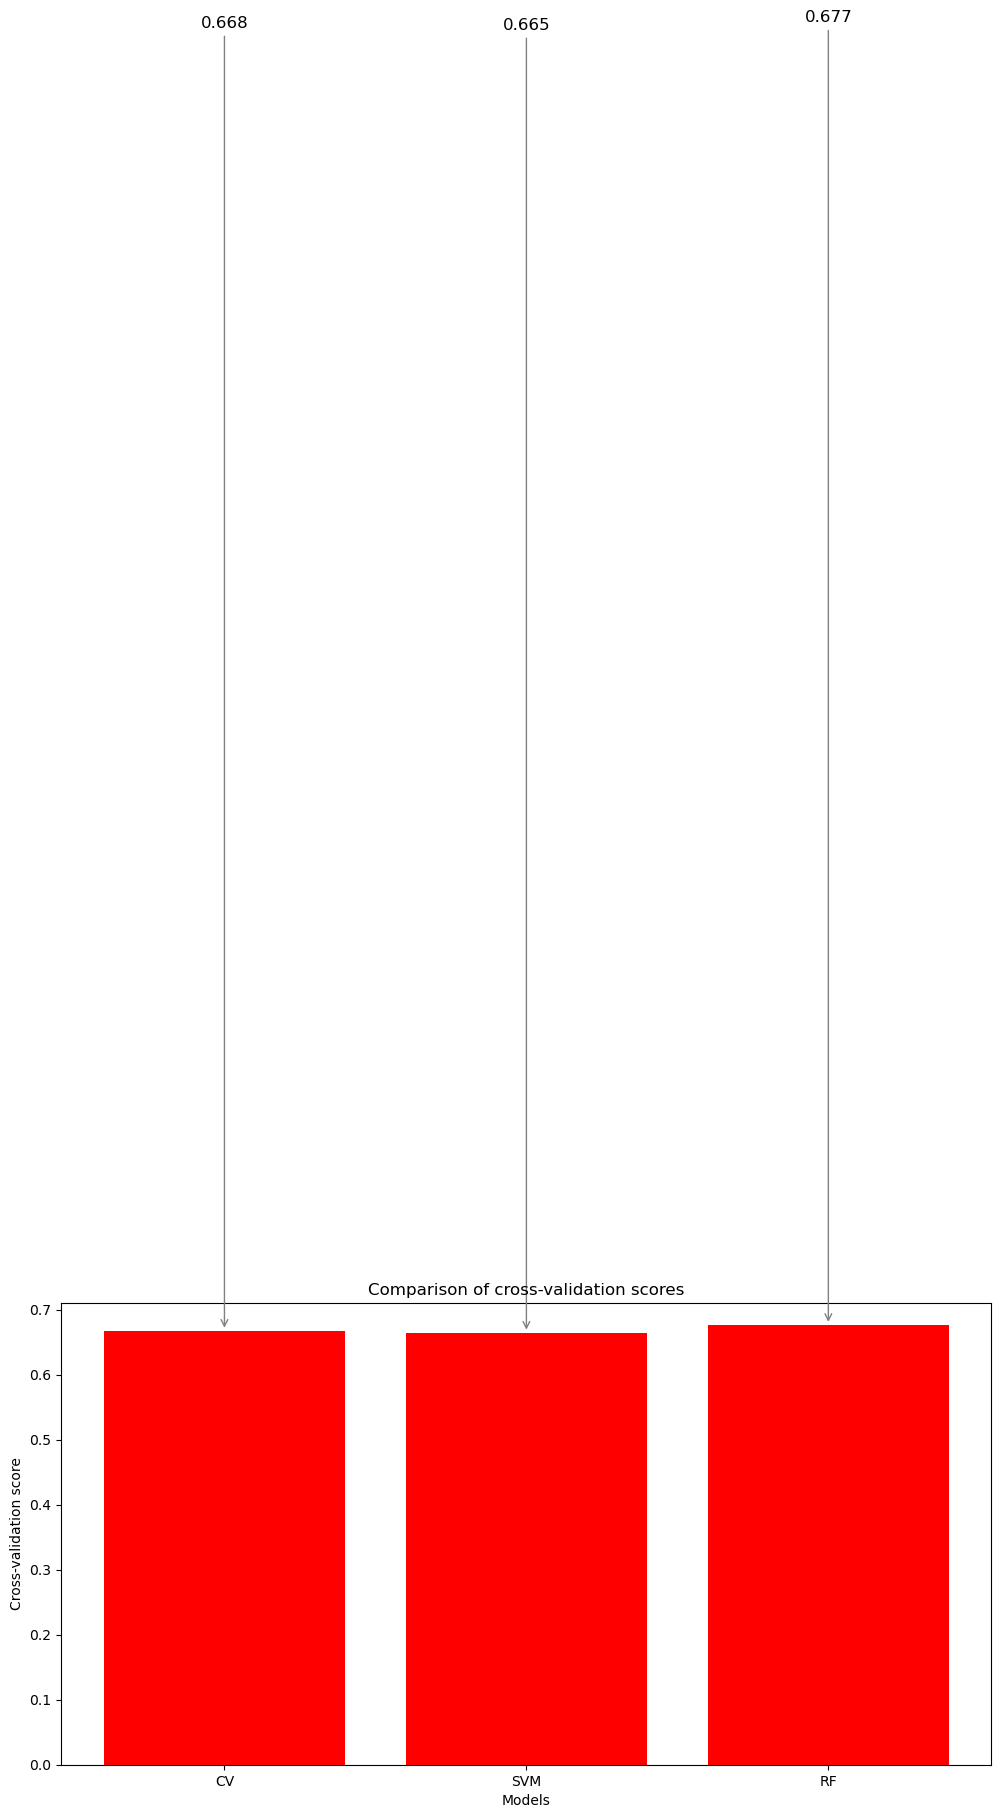

In [27]:
import matplotlib.pyplot as plt

# Example data
models = ['CV', 'SVM', 'RF']
cv_score = 0.668
svm_score = 0.665
rf_score = 0.677
scores = [cv_score, svm_score, rf_score]

# Create bar plot
fig = plt.figure(figsize=(12,6))   # set the figure size to 8 x 6 inches
plt.bar(models, scores,color='red')

for i, v in enumerate(scores):
    plt.annotate(str(v), xy=(i, v), xytext=(i, v + 2),
                 ha='center', va='bottom', fontsize=12,
                 arrowprops=dict(arrowstyle='->', color='gray'))

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Cross-validation score')
plt.title('Comparison of cross-validation scores')

# Display plot
plt.show()


# Conclusion and Future Direction

Conclusion: To sum up, it is evident that England won the 2019 World Cup based on their dominant performance relative to other teams. They have performed incredibly well. And since England actually won the World Cup in 2019, we can conclude that our model, at long last, provided an accurate result. If the dataset is large enough, we can increase accuracy by utilising hyperparameters, but the prediction was still done correctly.

future direction: If you watch cricket, you will be aware that after the conclusion of each game, awards are given to the best fielder, best batsman, and best bowler in the competition. The next step in this research will focus on player statistics to determine which players will receive which honors. We have also observed in the IPL that the team spirit award, which is given to the entire team, is introduced along with a coin toss prediction that if the team wins the toss what are the chances of winning and chances of losing these are the main future direction I will be looking at it.

# References:

[1]:  Authors names, title of the paper, Conference Name,Year, page number (iff available)

[2]:  Author names, title of the paper, Journal Name,Journal Vol, Issue Num, Year, page number (iff available)